# Linear Regression


$$
f: \mathbb{R} \to \mathbb{R} \quad
f(x; \mathbf{w}) =
w_0 + w_1 x
$$


$$
f: \mathbb{R}^d \to \mathbb{R} \quad
f(x; \mathbf{w}) =
w_0 + w_1 x_1 + \dots + w_d x_d = \mathbf{w}^Tx
$$


$$
\mathbf{w} =
\begin{bmatrix}
w_0, w_1, \dots, w_d
\end{bmatrix}^T
$$

are parameters we need to set.


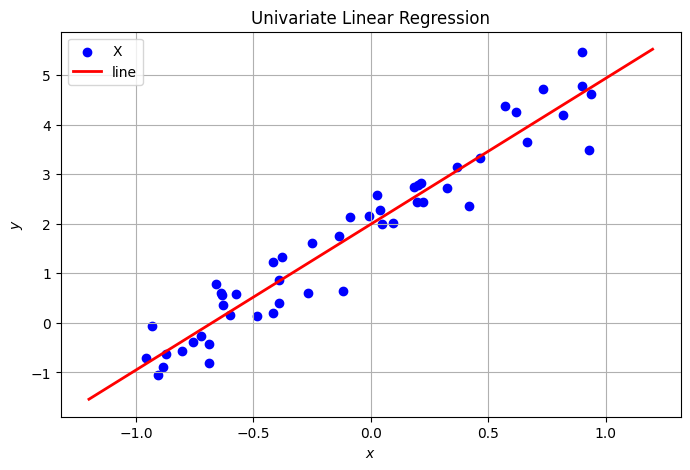

w0 (intercept) = 1.99
w1 (slope) = 2.94


In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1  
y = 2 + 3 * X + np.random.randn(50, 1) * 0.5  

model = LinearRegression()
model.fit(X, y)

X_new = np.linspace(-1.2, 1.2, 100).reshape(-1, 1)
y_pred = model.predict(X_new)


plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='X')
plt.plot(X_new, y_pred, color='red', linewidth=2, label='line')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Univariate Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

print(f"w0 (intercept) = {model.intercept_[0]:.2f}")
print(f"w1 (slope) = {model.coef_[0][0]:.2f}")

Linear regression assumes a linear relationship between the input features and the output. The model predicts $ y $ using the equation:

$$
y = \mathbf{Xw} + w_0
$$

Here:
- $ \mathbf{X} $: The matrix of input features.
- $ \mathbf{w} $: The weight vector (parameters).
- $ w_0 $: The bias term.
- $ y $: The predicted output.


The objective is to find $ \mathbf{w} $ and $ b $ that minimize the error between predicted and actual values. The error is typically measured using the **Mean Squared Error (MSE):**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

## How to find optimal w

First approach:

The optimal solution for $ \mathbf{w} $ and $ b $ can be computed directly using the closed-form equation:

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

Where:
- $ \mathbf{X}^T $: Transpose of the feature matrix.
- $ (\mathbf{X}^T \mathbf{X})^{-1} $: Inverse of the Gram matrix.

For simplicity, $ b $ (bias) can be incorporated into $ \mathbf{X} $ by adding a column of ones.



$$
J(\mathbf{w}) =
\frac{1}{n}\sum_{i=1}^n \big( y^{(i)} - f(\mathbf{x}^{(i)}; \mathbf{w}) \big)^2 =
\frac{1}{n}\sum_{i=1}^n \big( y^{(i)} - \mathbf{w}^T \mathbf{x}^{(i)} \big)^2
$$



$$
\mathbf{y} =
\begin{bmatrix}
y^{(1)} \\ \vdots \\ y^{(n)}
\end{bmatrix},
\quad
\mathbf{X} =
\begin{bmatrix}
1 & x_1^{(1)} & \cdots & x_d^{(1)} \\
1 & x_1^{(2)} & \cdots & x_d^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(n)} & \cdots & x_d^{(n)}
\end{bmatrix},
\quad
\mathbf{w} =
\begin{bmatrix}
w_0 \\ w_1 \\ \vdots \\ w_d
\end{bmatrix}
$$



$$
J(\mathbf{w}) =
\frac{1}{n}\big\| \mathbf{y} - \mathbf{X} \mathbf{w} \big\|^2
$$


why?

$$
J(\mathbf{w}) =
\frac{1}{n}\big\| \mathbf{y} - \mathbf{X} \mathbf{w} \big\|^2
$$



$$
\nabla_{\mathbf{w}} J(\mathbf{w}) =
\frac{-2}{n} \mathbf{X}^T (\mathbf{y} - \mathbf{X} \mathbf{w})
$$



$$
\nabla_{\mathbf{w}} J(\mathbf{w}) = 0
\;\; \Rightarrow \;\;
\mathbf{X}^T \mathbf{X} \mathbf{w} =
\mathbf{X}^T \mathbf{y}
$$



$$
\mathbf{w} =
\big( \mathbf{X}^T \mathbf{X} \big)^{-1} \mathbf{X}^T \mathbf{y}
$$


In [151]:
import numpy as np
# n_sample, n_feature
X = 10 * np.random.rand(300,1)
y_true = np.array([4 , 3.5])
y = y_true[0] + y_true[1]* X[:,0] +np.random.randn(300)

In [152]:
X

array([[8.92558998],
       [5.39342242],
       [8.07440155],
       [8.960913  ],
       [3.18003475],
       [1.10051925],
       [2.27935163],
       [4.27107789],
       [8.18014766],
       [8.60730583],
       [0.06952131],
       [5.10747303],
       [4.17411003],
       [2.2210781 ],
       [1.19865367],
       [3.37615171],
       [9.42909704],
       [3.23202932],
       [5.18790622],
       [7.03018959],
       [3.63629602],
       [9.71782083],
       [9.62447295],
       [2.51782296],
       [4.97248506],
       [3.0087831 ],
       [2.84840494],
       [0.36886947],
       [6.09564334],
       [5.02679023],
       [0.51478751],
       [2.78646464],
       [9.08265886],
       [2.39561891],
       [1.44894872],
       [4.8945276 ],
       [9.85650454],
       [2.42055272],
       [6.72135547],
       [7.61619615],
       [2.37637544],
       [7.28216349],
       [3.67783133],
       [6.32305831],
       [6.33529711],
       [5.35774684],
       [0.9028977 ],
       [8.353

In [153]:
y

array([36.39767582, 23.66864116, 32.88452525, 35.99154101, 15.11787485,
        6.95456299, 12.05353525, 18.27161089, 33.60563654, 33.97851303,
        3.41782737, 21.55476975, 19.02231656, 11.21004881,  7.37306746,
       16.06021821, 37.24680621, 14.80515945, 21.68663346, 28.8377135 ,
       15.27895174, 36.60490912, 36.9672111 , 12.5989332 , 21.71460527,
       16.00609706, 14.82707693,  5.13110463, 25.31573548, 20.59123645,
        5.78324316, 13.46396761, 36.11202457, 11.55743523,  9.59066704,
       22.66358552, 38.38900575, 12.87364623, 28.21488815, 30.25546606,
       12.54140652, 29.5001646 , 16.97008574, 25.35769429, 26.19805005,
       23.25011223,  8.61128556, 34.19485817, 17.38048473,  9.7608003 ,
        6.29945059, 24.86459502, 29.9045556 ,  3.77227573, 21.0835352 ,
       11.32795949, 24.45715194,  9.57706999, 27.42368817, 17.68613091,
       37.12730558, 10.68940388, 16.88774612,  7.39466959, 35.46586197,
       35.19879654, 11.70772376, 28.93090038, 33.78221713, 22.96

In [154]:
y.shape

(300,)

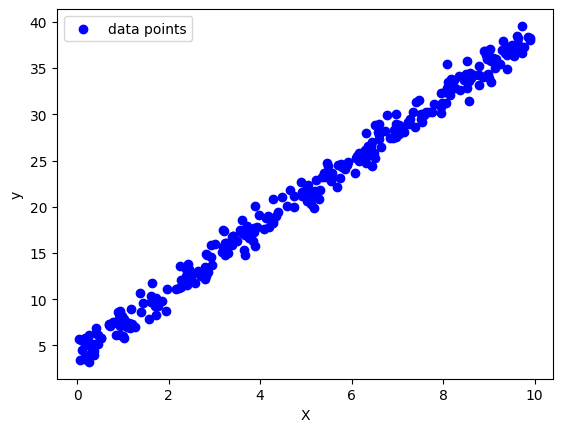

In [155]:
import matplotlib.pyplot as plt 
plt.scatter(X,y,color= 'blue',label='data points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [156]:
class LinearRegressor:
    def __init__(self):
        self.weights = None

    def fit(self ,X ,y):
        Xone = np.ones((X.shape[0],1))
        Xbias = np.hstack([Xone,X])
        X_transpose = np.transpose(Xbias)
        self.weights = np.linalg.inv(X_transpose @ Xbias)@X_transpose@y

    def predict(self , X):
        Xone = np.ones((X.shape[0],1))
        Xbias = np.hstack([Xone,X])
        return Xbias @ self.weights
    

In [157]:
model =LinearRegressor()
model.fit(X,y)
y_pred = model.predict(X)

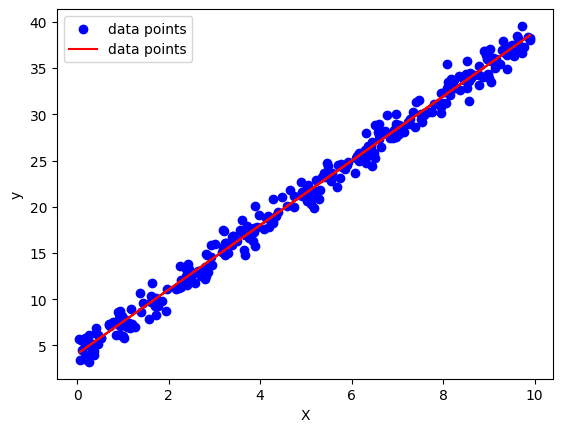

In [158]:
plt.scatter(X,y,color= 'blue',label='data points')
plt.plot(X,y_pred,color= 'red',label='data points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [159]:
model.weights

array([4.07895485, 3.48315943])

Second approach:Iterative optimization of cost function

We will use gradiant descent!

🔷 Cost function:
$$
J(w)
$$

🔷 Optimization problem:
$$
\hat{w} =
\arg \min_w J(w)
$$


🔷 Steps:
- Start from $ w^0 $
- Repeat:
  - Update $ w^t $ to $ w^{t+1} $ in order to reduce $ J $
  - $ t \gets t + 1 $
- until we hopefully end up at a minimum

Gradiant descent:

$$
\mathbf{w}^{t+1} =
\mathbf{w}^t -
\gamma_t \nabla J(\mathbf{w}^t)
$$



We want to minimize the **Mean Squared Error (MSE)** cost function:
$$
J(w) =
\frac{1}{n} \sum_{i=1}^n \big( y^{(i)} - w^T x^{(i)} \big)^2
$$


$$
J(w) =
\frac{1}{n} (y - Xw)^T (y - Xw)
$$



$$
J(w) =
\frac{1}{n} \big[ y^T y - 2 y^T X w + w^T X^T X w \big]
$$


$$
\nabla_w J(w) =
\frac{1}{n} \big[ 0 - 2 X^T y + 2 X^T X w \big]
$$


$$
\nabla_w J(w) =
\frac{2}{n} X^T (Xw - y)
$$




## Gradient Descent for Univariate Linear Regression
We aim to minimize the cost function:  

$$
J(m, b) =
\frac{1}{n} \sum_{i=1}^{n} \big( y_i - (m x_i + b) \big)^2
$$

where:
- \( m \) is the slope,
- \( b \) is the intercept,
- \( n \) is the number of data points.


### Gradients

The partial derivatives of \( J(m, b) \) are:  

$$
\frac{\partial J}{\partial m} =
-\frac{2}{n} \sum_{i=1}^n x_i \big( y_i - (m x_i + b) \big)
$$

$$
\frac{\partial J}{\partial b} =
-\frac{2}{n} \sum_{i=1}^n \big( y_i - (m x_i + b) \big)
$$


### Update rules

The gradient descent update rules are:

$$
m := m - \alpha \cdot \frac{\partial J}{\partial m}
$$

$$
b := b - \alpha \cdot \frac{\partial J}{\partial b}
$$



    


In [160]:
class UnivariateLinearRegression:
    def __init__(self, lr = 0.01 , epoch =1000):
        self.lr = lr
        self.epoch = epoch
        self.m = 0
        self.b = 0
        self.loss_history = []

    def fit(self , X, y):
        x=np.array(X)
        y=np.array(y)
        n = len(X)

        for epoch in range(self.epoch):
            y_pred = self.m * x + self.b
            error = y-y_pred

            dm = -(2/n) * np.sum(x * error)
            db = -(2/n) * np.sum(error) 

            self.m -= self.lr * dm
            self.b -= self.lr * db


            y_pred = self.m * x + self.b
            error = y-y_pred

            loss = np.mean (error **2)
            self.loss_history.append(loss)


            if epoch %100 ==0:
                print(f"Epoch {epoch} , Loss {loss:.4f}")


    def predict(self,X):
        x= np.array(X)
        return self.m * x+ self.b 
    
    def plot_loss(self):
        plt.plot(self.loss_history)
        plt.xlabel("Epoch")
        plt.ylabel('MSE Error')
        plt.show()

        

In [161]:
x = [1,2,3,4,5,6]
y = [2,5,6,8,12, 14]
model = UnivariateLinearRegression(lr = 0.01 , epoch=1000)
model.fit(x,y)


Epoch 0 , Loss 36.4900
Epoch 100 , Loss 0.4893
Epoch 200 , Loss 0.4446
Epoch 300 , Loss 0.4231
Epoch 400 , Loss 0.4128
Epoch 500 , Loss 0.4078
Epoch 600 , Loss 0.4054
Epoch 700 , Loss 0.4042
Epoch 800 , Loss 0.4037
Epoch 900 , Loss 0.4034


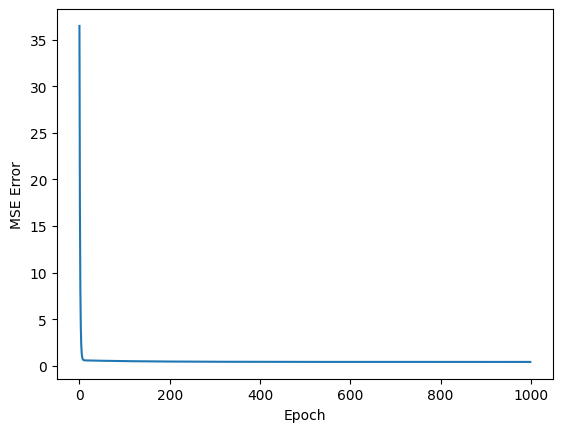

In [162]:
model.plot_loss()

In [163]:
class LinearRegressorGD:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        X_bias = np.hstack([np.ones((n_samples, 1)), X])
        self.weights = np.zeros(X_bias.shape[1])

        for i in range(self.n_iters):
            y_pred = X_bias @ self.weights  
            error = y_pred - y              
            gradients = (2/n_samples) * (X_bias.T @ error) 
            self.weights -= self.learning_rate * gradients  

    def predict(self, X):
        n_samples = X.shape[0]
        X_bias = np.hstack([np.ones((n_samples, 1)), X])
        return X_bias @ self.weights


## Polynomial Regression



Polynomial Regression is an extension of Linear Regression that models the relationship between the dependent and independent variables as an nth-degree polynomial.

Given the features \(X\), polynomial regression tries to fit a model of the form:

$$
y = w_0 + w_1 X + w_2 X^2 + w_3 X^3 + \dots + w_n X^n
$$

Where:
- $X$ is the input feature.
- $w_0, w_1, \dots, w_n$ are the weights (coefficients) to be learned.
- $n$ is the degree of the polynomial.

To fit this model, we can use the same closed-form solution as in linear regression, but now the features include powers of $X$.


In [164]:
X = np.linspace(-2, 2, 100)
y = X**4 - 4*X**3 + 16*X + 4 * np.random.randn(100)

Let's create a sample dataset of size 100 from following formula:

$$
y = x^4 - 4x^3 + 16 x + 4ϵ \ \ \ , \ \ \ x \in [-2, 2]
$$

where $\epsilon$ represents noise drawn from a $\mathcal{N}(0, 1)$ distribution.

The dataset will be split into 80% training data and 20% test data. Next, visualize the fitted polynomial curves for degrees ranging from 3 to 11. Additionally, compute and display the RMSE for both the training and test sets:

In [165]:
np.random.seed(42)
msk = np.random.randn(100) < 0.7
x_train = X[msk]
x_test = X[~msk]
y_train = y[msk]
y_test = y[~msk]

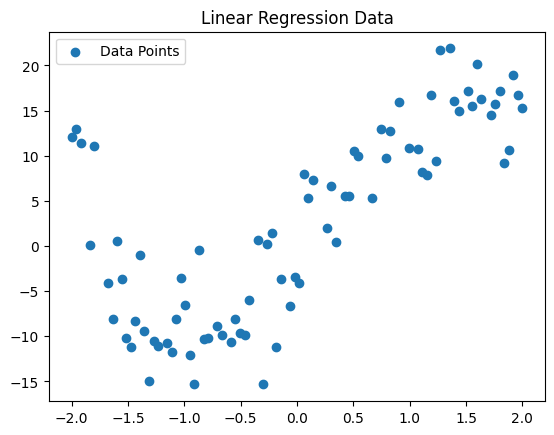

In [166]:
plt.scatter(x_train, y_train, label='Data Points')
plt.title("Linear Regression Data")
plt.legend()
plt.show()

In [167]:
def Polynomial(X, y, x_test, d):
    x_train = np.vander(X , d + 1, increasing=True)
    x_test = np.vander(x_test, d + 1, increasing=True)
    model = LinearRegression()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    return pred

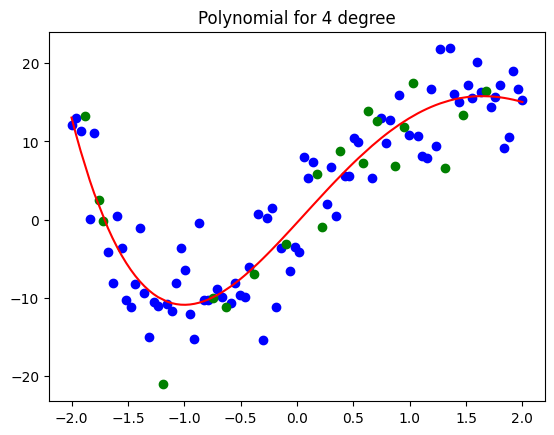

In [168]:
def visualizer(d):
    pred = Polynomial(x_train, y_train, x_train, d)
    plt.scatter(x_train, y_train, color='blue')
    plt.scatter(x_test, y_test, color='green')
    plt.plot(x_train, pred, color='red')
    plt.title(f'Polynomial for {d} degree')

visualizer(4)

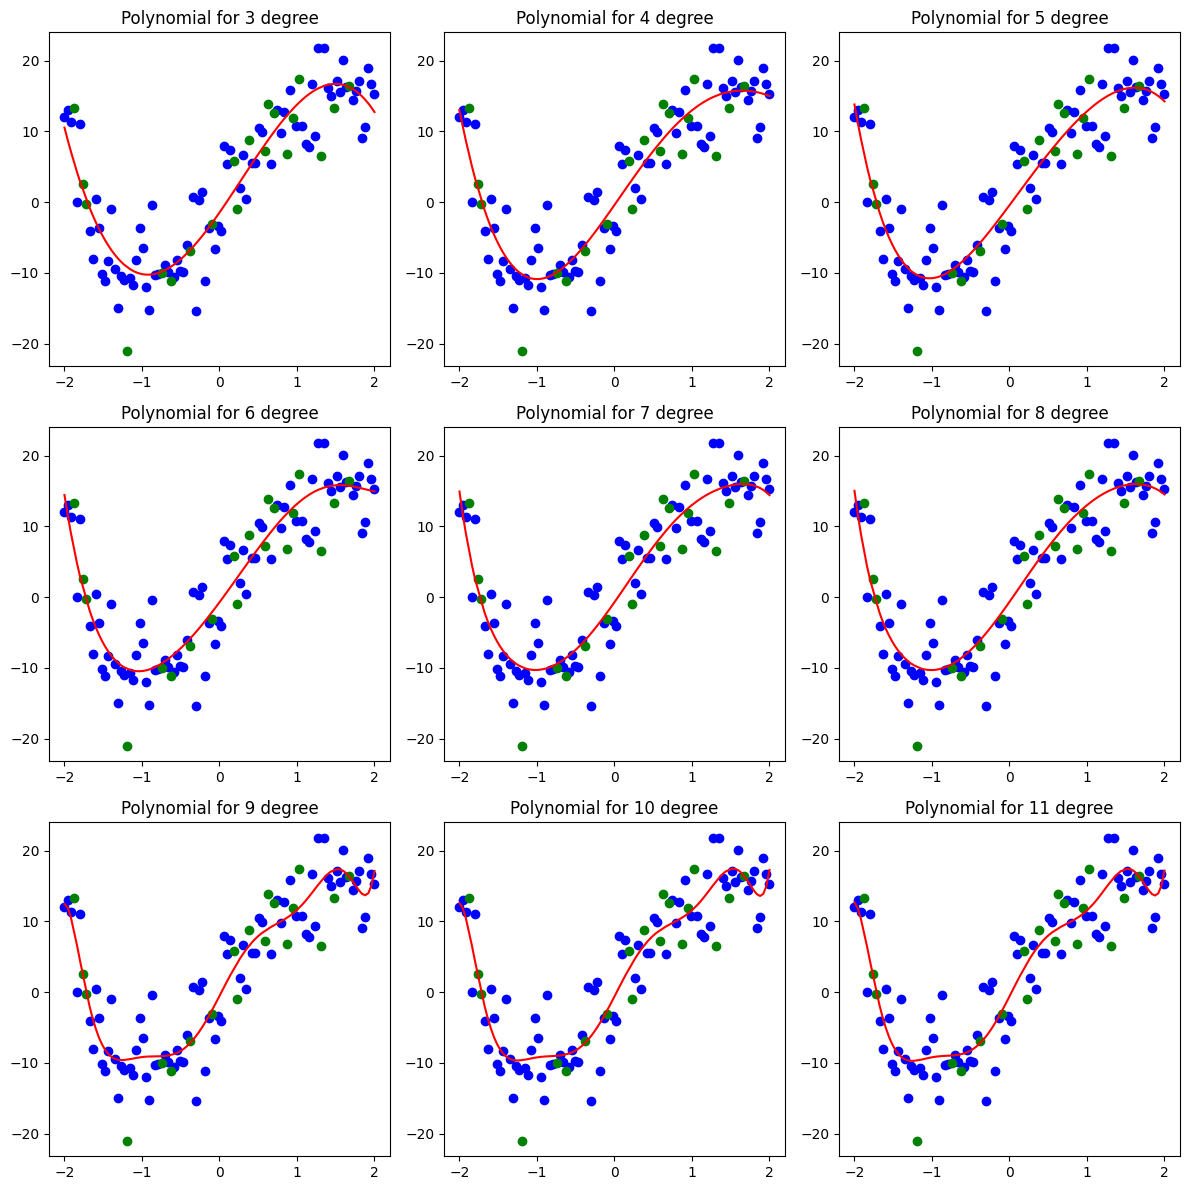

In [169]:
plt.figure(figsize=(12, 12))

for d in range(3, 12):
    plt.subplot(3, 3, d - 2)
    visualizer(d)
plt.tight_layout()
plt.show()

## Regularization

Polynomial Regression can be enhanced with **regularization** to reduce the risk of overfitting, especially when working with high-degree polynomials. Two common regularization techniques are **Ridge Regression** and **Lasso Regression**, which modify the cost function to penalize large coefficients.

1. **Ridge Regression (L2 Regularization)**:
   Ridge regression penalizes the sum of the squared coefficients. The modified cost function is:
   $$
   J(w) = \frac{1}{2m} \| y - Xw \|^2 + \lambda \| w \|^2
   $$
   - $ \lambda $: Regularization strength.
   - $ \| w \|^2 $: Sum of squared weights.

2. **Lasso Regression (L1 Regularization)**:
   Lasso regression penalizes the sum of the absolute coefficients. The modified cost function is:
   $$
   J(w) = \frac{1}{2m} \| y - Xw \|^2 + \lambda \| w \|_1
   $$
   - $ \| w \|_1 $: Sum of absolute weights.


**Gradient Descent** is an iterative optimization algorithm used to minimize the cost function. For polynomial regression with regularization, the gradient updates are:

- For **Ridge**:
   $$
   w = w - \eta \left[ \frac{\partial J(w)}{\partial w} \right] = w - \eta \left[ \frac{1}{m} X^T (Xw - y) + \frac{\lambda}{m} w \right]
   $$

- For **Lasso**:
   $$
   w = w - \eta \left[ \frac{1}{m} X^T (Xw - y) + \frac{\lambda}{m} \cdot \text{sign}(w) \right]
   $$
   Where:
   - $ \eta $ is the learning rate.
   - $ \text{sign}(w) $ is the sign of the weights.


In [170]:
class LinearRegressionGradient:
    def __init__(self, lr=0.01, epochs=1000, weight_decay=1e-4, regularization_type='lasso'):
        self.weights = None
        self.bias = 0
        self.epochs = epochs
        self.lr = lr
        self.reg = weight_decay
        self.reg_type = regularization_type

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)
        n_samples, n_features = X.shape

        self.weights = np.zeros((n_features, 1))

        for epoch in range(self.epochs):
            y_pred = X @ self.weights + self.bias

            if self.reg_type == 'lasso':
                dw = (-(1/n_samples) * (X.T @ (y - y_pred)) ) + ((self.reg / n_samples) * np.sign(self.weights))

            elif self.reg_type == 'ridge':
                dw = (-(1/n_samples) * (X.T @ (y - y_pred)) ) + ((self.reg / n_samples) * self.weights)
                
            else:
                dw = -(1/n_samples) * (X.T @ (y - y_pred))
                
           
            db = -(1/n_samples) * np.sum(y - y_pred)

            self.bias -= self.lr * db
            self.weights -= self.lr * dw

    def predict(self, X):
        X = np.array(X)
        return X @ self.weights + self.bias

In [171]:
from sklearn.metrics import root_mean_squared_error

alphas = [0.05, 0.1, 0.5, 1, 5, 10]
x_train = np.vander(x_train, 5, increasing=True)[:, 1:]
x_test = np.vander(x_test, 5, increasing=True)[:, 1:]

for alpha in alphas:
    model_ridge = LinearRegressionGradient(lr=0.01, epochs=5000, weight_decay=alpha, regularization_type='ridge')
    model_ridge.fit(x_train, y_train)
    pred_ridge = model_ridge.predict(x_test)
    rmse_ridge = root_mean_squared_error(y_test, pred_ridge)

    model_lasso = LinearRegressionGradient(lr=0.01, epochs=5000, weight_decay=alpha, regularization_type='lasso')
    model_lasso.fit(x_train, y_train)
    pred_lasso = model_lasso.predict(x_test)
    rmse_lasso = root_mean_squared_error(y_test, pred_lasso)

    print(f"Alpha: {alpha}")
    print(f"Ridge Test RMSE: {rmse_ridge}")
    print(f"Lasso Test RMSE: {rmse_lasso}")

Alpha: 0.05
Ridge Test RMSE: 4.229551697823034
Lasso Test RMSE: 4.224899927730655
Alpha: 0.1
Ridge Test RMSE: 4.234305741587057
Lasso Test RMSE: 4.224908490143098
Alpha: 0.5
Ridge Test RMSE: 4.2754621936380195
Lasso Test RMSE: 4.225019547940326
Alpha: 1
Ridge Test RMSE: 4.333461431118825
Lasso Test RMSE: 4.225264758516684
Alpha: 5
Ridge Test RMSE: 4.897710943223505
Lasso Test RMSE: 4.231477455969449
Alpha: 10
Ridge Test RMSE: 5.553065306616853
Lasso Test RMSE: 4.250887652556296


## Scikit-Learn

Scikit-learn (or sklearn) is a popular open-source Python library for machine learning.

It provides simple and efficient tools for
- Supervised learning — e.g., classification & regression
- Unsupervised learning — e.g., clustering & dimensionality reduction
- Model evaluation & selection — cross-validation, metrics, grid search
- Data preprocessing — scaling, encoding, feature selection, pipelines

how to install?

In [187]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Regression using scikit-learn

Signature:
```python
sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, tol=1e-6, n_jobs=None, positive=False)
```

# sklearn.linear_model.LinearRegression Parameters

## Parameters

 `fit_intercept` : `bool`, default = `True`
- Whether to calculate the **intercept** \(b\) in the model:  
  \( y = Xw + b \).
- If `True`, an intercept term is included in the model.
- If `False`, no intercept is fitted (the data is assumed to be centered).



 `copy_X` : `bool`, default = `True`
- Whether to make a copy of the input data `X`.
- If `True`, the input `X` is copied during fitting, preserving the original.
- If `False`, `X` may be overwritten for efficiency.



 `tol` : `float`, default = `1e-6`
- Tolerance for the stopping criterion.
- Relevant if the solver is iterative (e.g., when `positive=True`).
- Smaller `tol` means higher precision but may require more computation.



`n_jobs` : `int`, default = `None`
- The number of CPU cores to use during computation:
  - `None` → 1 core.
  - `-1` → use all available cores.
  - positive integer → use that many cores.
- Helps speed up computation on large datasets.



 `positive` : `bool`, default = `False`
- When set to `True`, forces the coefficients \(w\) to be **non-negative** (≥ 0).
- Useful if you know the relationship between predictors and response cannot be negative.
- Uses `scipy.optimize.nnls` under the hood when `True`.

## Attributes

`coef_` : `array`, shape `(n_features,)` or `(n_targets, n_features)`
- **Type:** `numpy.ndarray`
- **Set when:** After calling `.fit()`.
- **What it is:**  
  The estimated **coefficients (weights)** of the model for each feature.
  - If `y` is 1D: shape is `(n_features,)`
  - If `y` is 2D (multi-target): shape is `(n_targets, n_features)`
- **Purpose:** Shows how much each feature contributes to the prediction.


`intercept_` : `float` or `array`, shape `(n_targets,)`
- **Type:** `float` or `numpy.ndarray`
- **Set when:** After calling `.fit()`.
- **What it is:**  
  The **intercept (bias) term** in the model.
  - If `fit_intercept=False`, then `intercept_ = 0.0`.
  - If `y` is multi-target, this is an array.
- **Purpose:** The constant term in the prediction equation \( y = Xw + b \).





## Methods



 `.fit(X, y)`
- **Represents:** the **training action** of the model.
- **What it does:** teaches the model the relationship between `X` (features) and `y` (target).
- **When to use:** first, to fit the model before making predictions.
- **Effect:** after calling `.fit()`, the model learns its parameters (`coef_` and `intercept_` become available).



 `.predict(X)`
- **Represents:** the model’s **ability to make predictions**.
- **What it does:** uses the learned parameters to predict target values for new data `X`.
- **When to use:** after `.fit()` has been called.



 `.score(X, y)`
- **Represents:** the model’s **performance measurement**.
- **What it does:** computes the \( R^2 \) score (coefficient of determination) on given `X` and `y`.
- **When to use:** after `.fit()`, to evaluate how well the model fits the data.



`.get_params()`
- **Represents:** the **current configuration** of the model (hyperparameters).
- **What it does:** returns a dictionary of the model’s parameters and their current values.
- **When to use:** to inspect or save the model configuration.






 Example

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True, copy_X=True, tol=1e-6, n_jobs=-1, positive=False)

model.fit(X_train, y_train)
```


In [176]:
X = 10 * np.random.rand(200,1)
y_true = np.array([4 , 3.5])
y = y_true[0] + y_true[1]* X[:,0] +7*(np.random.randn(200))

plot:

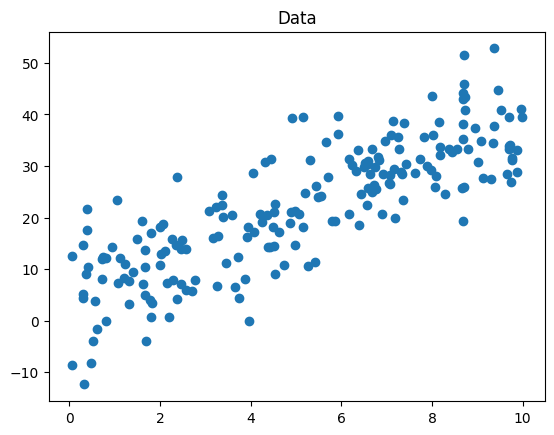

In [177]:
plt.scatter(X, y)
plt.title('Data')
plt.show()

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [181]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [182]:
print(f'Intercept (w0): {model.intercept_}')
print(f'Slope (w1): {model.coef_}')

Intercept (w0): 3.481599716116328
Slope (w1): [3.60073144]


In [186]:
pred = model.predict(X_test)

In [188]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(pred, y_test))

65.40741666576919


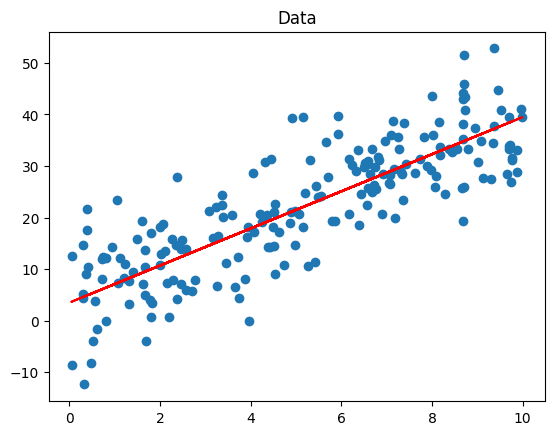

In [189]:
plt.scatter(X, y)
plt.plot(X_test, pred, color='red')
plt.title('Data')
plt.show()

0.7692735413614223

## Cross Validation
Most of the time we need to select among a set of models
- Example: polynomials with different degree 𝑚

and thus we need to evaluate these models first

We can use two methods:
- Simple Hold-out
- Cross Validation

## Simple Hold-out method

## 📋 Steps

- Divide training data into **training** and **validation set**  $v_{\text{set}}$ 
- Use only the training set to train a set of models
- Evaluate each learned model on the validation set
-  
  $
  J_v(\mathbf{w}) =
  \frac{1}{|v_{\text{set}}|} 
  \sum_{i \in v_{\text{set}}} 
  \left( y^{(i)} - f\big( \mathbf{x}^{(i)} ; \mathbf{w} \big) \right)^2
  $
- Choose the best model based on the validation set error


## Cross Validation

## 📋 *k*-fold Cross-Validation Steps

- Shuffle the dataset and randomly partition training data into $ k $ groups of approximately equal size.
- For $ i = 1 $ to $ k $:
  - Choose the $ i $-th group as the held-out validation group.
  - Train the model on all but the $ i $-th group of data.
  - Evaluate the model on the held-out group.
- Performance scores of the model from $ k $ runs are **averaged**.
  - The average error rate can be considered as an estimation of the true performance.

![CV](CV.png)


Degree: 1, Mean MSE: 2.1953
Degree: 2, Mean MSE: 0.2103
Degree: 3, Mean MSE: 0.2065
Degree: 4, Mean MSE: 0.2181
Degree: 5, Mean MSE: 0.2172
Degree: 6, Mean MSE: 0.2094
Degree: 7, Mean MSE: 0.2289
Degree: 8, Mean MSE: 0.2270
Degree: 9, Mean MSE: 0.2320


Degree 1: Mean CV MSE = 62.675
Degree 2: Mean CV MSE = 29.664
Degree 3: Mean CV MSE = 9.547
Degree 4: Mean CV MSE = 9.747
Degree 5: Mean CV MSE = 10.095
Degree 6: Mean CV MSE = 10.428
Degree 7: Mean CV MSE = 12.307
Degree 8: Mean CV MSE = 11.122
Degree 9: Mean CV MSE = 11.070


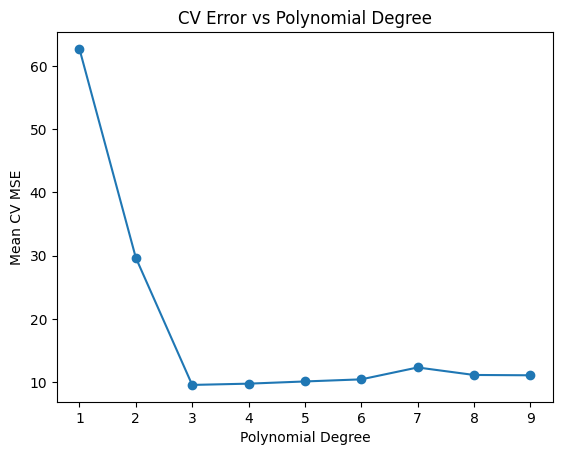